# Ejercicios de ilustración método de transformada inversa y aceptación y rechazo

In [1]:
# Importamos librerías a trabajar en todas las simulaciones
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle  # Librería para hacer ciclos
import scipy.stats as st     # Librería estadística
from math import factorial as fac # Importo la operación factorial

%matplotlib inline

### Ilustración método de la transformada inversa con paquete `stats`

In [ ]:
# Elegir la distribución
name_dist = ''
# Explorar la función de la función getattr
dist = 

In [ ]:
# Parametros de la distribución (tupla)
params = 1
# Cantidad de términos
N = 5000
# Diccionario de argumentos de la distribución
args = 

# Generación de variable aleatorias de la distrubición elegida
x = 

In [ ]:
# Comparación de histogramas
# 1. Histograma distribución original
plt.figure(figsize=[10,5])
plt.hist(x, bins=50,density=True, label='distribución original');

In [ ]:
# 2. Implementación del método de la transformada inversa usando función 'ppf'
U = 
f_inv = 
plt.hist(f_inv, bins=50, density=True, label='método de la transformada inversa');
plt.legend()

## <font color ='red'> **Ejercicio 2** 
 1. Generación variable aleatoria continua

$$
h(x)=
\begin{cases}
0, & x<0 \\
x, & 0 \le x < 1 \\
2-x, & 1\le x \le 2 \\
0,& x>1
\end{cases}
$$

Genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 100 muestras generadas con el método y compárela con el función $h(x)$ dada, esto con el fín de validar que el procedimiento fue realizado de manera correcta

### Método de la transformada inversa

In [ ]:
# Crear función acumulada (usar método vectorize(func, otypes=[float]))
H = 

In [ ]:
# Graficar función acumulada


In [ ]:
# Función de densidad h(x) 
h = 

In [ ]:
# Crear función inversa

# Validar función inversa (gráfica)

In [ ]:
# Vector de aleatorios uniformes

# Vector generado con MTI

# Graficar histograma aleatorios
plt.hist(x_rand, bins=50, density=True, label='generados con MTI')

# Comparar con gráfica de densidad
density = 

# Graficar función de densidad h(x)
plt.plot(x, density, label='$h(x)$')
plt.legend();

### Método de aceptación y rechazo

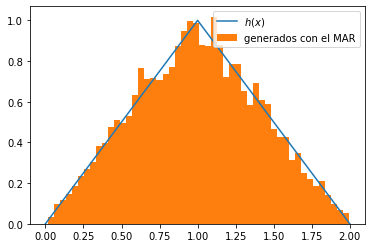

In [53]:
N = 100

# Graficar densidad de probabilidad h(x)

# Programar método de aceptación y rechazo

# Graficar puntos aceptados

# Almacenar números aceptados en una variable y graficar su histograma


## Ejercicio 3
Suponga que tiene la siguiente probability mass function 
$$
P(X=k) = 
\begin{cases} 
\frac{1}{3}\left( \frac{2}{3}\right)^{k-1}, & \text{si } k=1, 2, \cdots \\
0, & \text{otro caso}
\end{cases}
$$

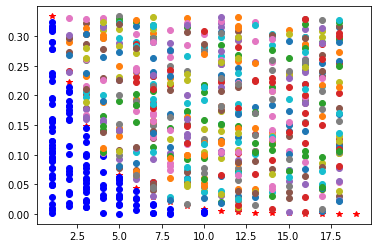

In [71]:
N = 700
# PMF p(x)
p = lambda k: (1 / 3) * (2 / 3) ** (k-1) 

# Gráfica de pmf
k = np.arange(1, 20)
plt.plot(k, p(k), 'r*')

# Método de aceptación rechazo discreto
max_p = p(1)
